In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline 
sns.set(color_codes=True)

In [97]:
#Read file
df = pd.read_csv('/Users/sumit/Data mining applicarions/Week 1 Assignment/Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [80]:
#type of da
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [99]:
#Checking the datatypes
#df['Year'] = df['ExactDate'].apply(lambda x: x[-4:])
#df['Month'] = df['ExactDate'].apply(lambda x: x[3:5])
#df['Date'] = df['ExactDate'].apply(lambda x: x[0:2])


#df = df.drop('ExactDate', axis=1)
df['Date'] = pd.to_datetime(df['Date'],  errors='coerce', format ='%d-%m-%Y')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
df[df[['Store', 'Date']].duplicated()]
#no duplicate values

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [12]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
df['Date'].max()

Timestamp('2012-10-26 00:00:00')

In [15]:
maxstd=pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

In [16]:
maxstd = maxstd.reset_index()

In [17]:
maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

In [18]:
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

In [ ]:
#sales in store 14 vary a lot

In [19]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [53]:
SuperBowl1=pd.Timestamp(date(2010,2,12) )
SuperBowl2=pd.Timestamp(date(2011,2,11) )
SuperBowl3=pd.Timestamp(date(2012,2,10) )


LabourDay1=pd.Timestamp(date(2010,9,10) )
LabourDay2=pd.Timestamp(date(2011,9,9) )
LabourDay3=pd.Timestamp(date(2012,9,7) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )


Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )

In [54]:
Christmas_mean_sale = df[(df['Date'] == Christmas1) | (df['Date'] == Christmas2) | (df['Date'] == Christmas3)]

In [55]:
Christmas_mean_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564
...,...,...,...,...,...,...,...,...
6105,43,2011-12-30,505405.85,1,41.83,3.129,211.074055,10.148
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610
6248,44,2011-12-30,263917.85,1,31.53,3.119,130.071032,6.078
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724


In [56]:
Thanksgiving_mean_sale = df[(df['Date']==Thanksgiving1) | (df['Date']==Thanksgiving2) | (df['Date']==Thanksgiving3)]

In [57]:
Thanksgiving_mean_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061402,7.564
...,...,...,...,...,...,...,...,...
6100,43,2011-11-25,669965.22,1,55.70,3.236,210.088857,10.148
6191,44,2010-11-26,307646.50,1,28.22,2.830,126.669267,7.610
6243,44,2011-11-25,309129.01,1,38.89,3.445,129.836400,6.078
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [58]:
SuperBowl_mean_sale = df[(df['Date']==SuperBowl1) | (df['Date']==SuperBowl2) | (df['Date']==SuperBowl3)]

In [59]:
SuperBowl_mean_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
105,1,2012-02-10,1802477.43,1,48.02,3.409,220.265178,7.348
144,2,2010-02-12,2137809.50,1,38.49,2.548,210.897994,8.324
196,2,2011-02-11,2168041.61,1,33.19,3.022,212.592862,8.028
...,...,...,...,...,...,...,...,...
6202,44,2011-02-11,307486.73,1,30.83,3.034,127.859129,7.224
6254,44,2012-02-10,325377.97,1,33.73,3.116,130.384903,5.774
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992
6345,45,2011-02-11,766456.00,1,30.30,3.239,183.701613,8.549


In [60]:
LabourDay_mean_sale = df[(df['Date']==LabourDay1) | (df['Date']==LabourDay2) | (df['Date']==LabourDay3)]

In [68]:
LabourDay_mean_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962
135,1,2012-09-07,1661767.33,1,83.96,3.730,222.439015,6.908
174,2,2010-09-10,1839128.83,1,79.09,2.565,211.153210,8.099
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852
...,...,...,...,...,...,...,...,...
6232,44,2011-09-09,295811.25,1,70.19,3.619,129.368613,6.560
6284,44,2012-09-07,338737.33,1,70.65,3.689,130.932548,5.407
6323,45,2010-09-10,721460.22,1,70.87,2.699,182.598178,8.743
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625


In [72]:
dict_of_mean_sales = {'Christmas_mean_sale' : round(Christmas_mean_sale['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sale': round(Thanksgiving_mean_sale['Weekly_Sales'].mean(),2),
'LabourDay_mean_sale' : round(LabourDay_mean_sale['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sale':round(SuperBowl_mean_sale['Weekly_Sales'].mean(),2),
'Non holiday weekly sale' : df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}

In [73]:
dict_of_mean_sales

{'Christmas_mean_sale': 960833.11,
 'Thanksgiving_mean_sale': 1471273.43,
 'LabourDay_mean_sale': 1042427.29,
 'SuperBowl_mean_sale': 1079127.99,
 'Non holiday weekly sale': 1041256.3802088555}

In [ ]:
#Lowest sale - Christmas
#Highest sale- Thanksgiving

Text(0, 0.5, 'Weekly_Sales')

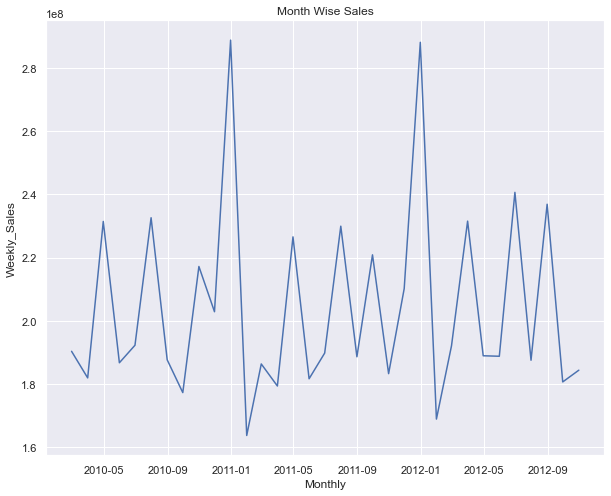

In [101]:
#Monthly sales 
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()
# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

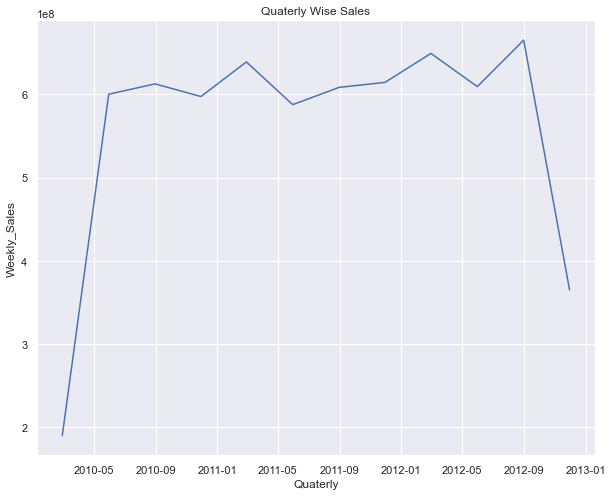

In [102]:
#Quaterly Sales 
Quaterly = df.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

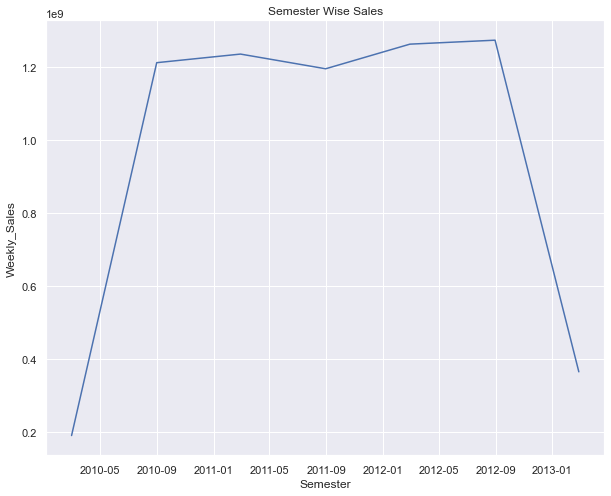

In [103]:
#Semester Sales 
Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

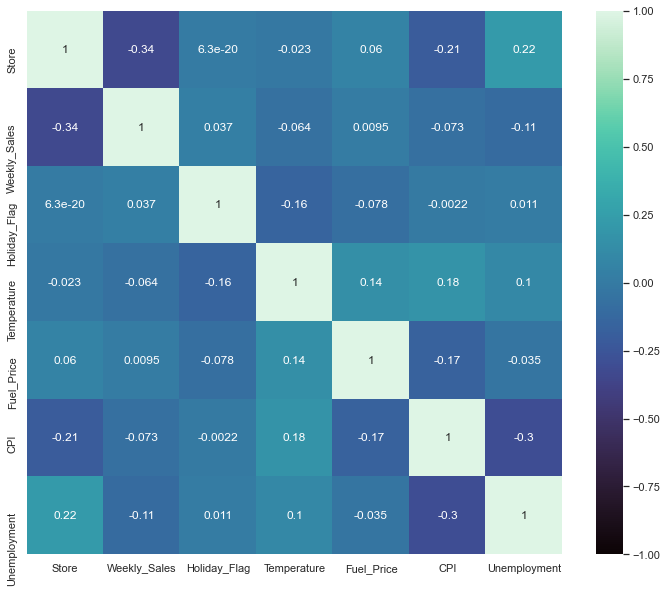

In [104]:
#Visualizing Correlations
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

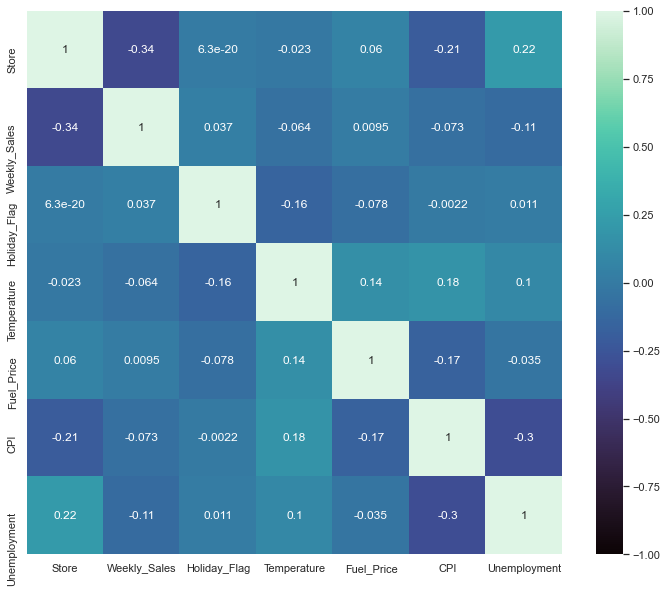

In [104]:
#Visualizing Correlations
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

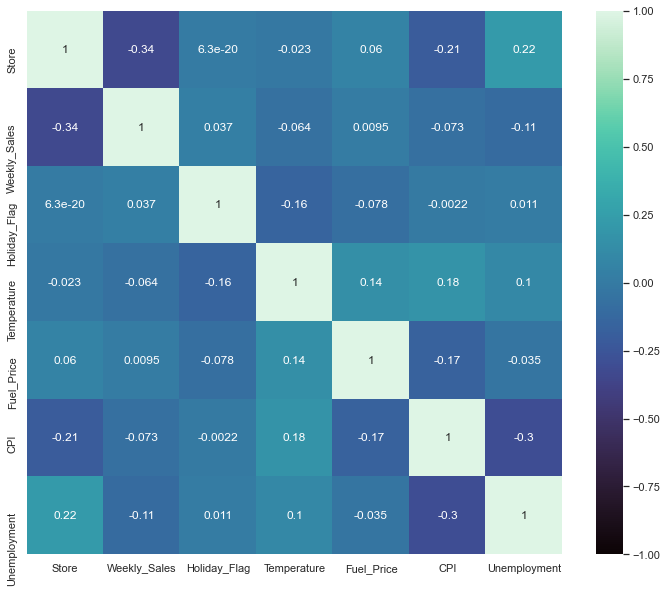

In [104]:
#Visualizing Correlations
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

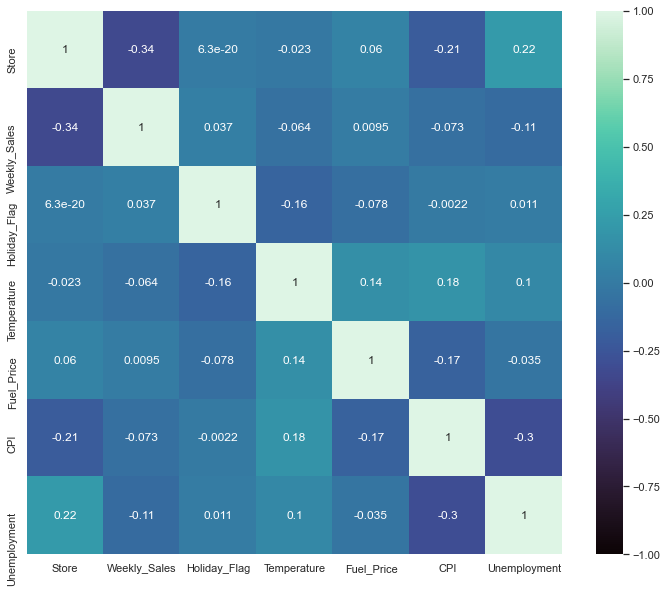

In [104]:
#Visualizing Correlations
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()